In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

In [66]:
input=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/inputs.npy", mmap_mode='r')
output=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/outputs.npy", mmap_mode='r')

In [67]:
output1=output[:,1,:,:,:]

In [68]:
input_flat = input.reshape(input.shape[0], -1)
output1_flat= output1.reshape(output1.shape[0], -1)

In [69]:
input_mean= np.mean(input_flat, axis= 0)

In [70]:
index_true_input= np.where(input_mean>0)[0]
index_false_input= np.where(input_mean==0)[0]
true_input_mean= input_mean[index_true_input]

In [71]:
true_input=input_flat[:,index_true_input]
true_output= output1_flat[:,index_true_input]

In [72]:
j = random.randint(0,len(index_false_input)-1) #to choose a voxel randomly

In [73]:
def cross_entropy(i,o):
    return -i*np.log(o)-(1-i)*np.log(1-o)

In [74]:
ce_j=[]

for i in range(len(output1_flat)):
    ce_j.append(cross_entropy(0,output1_flat[i,j]))

/tmp/ipykernel_2787455/849717838.py:2: RuntimeWarning: divide by zero encountered in log
  return -i*np.log(o)-(1-i)*np.log(1-o)
/tmp/ipykernel_2787455/849717838.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  return -i*np.log(o)-(1-i)*np.log(1-o)


(array([    0.,     0.,     0.,     0.,     0., 17624.,     0.,     0.,
            0.,     0.]),
 array([-0.5       , -0.40000001, -0.30000001, -0.19999999, -0.09999999,
         0.        ,  0.10000002,  0.19999999,  0.30000001,  0.40000004,
         0.5       ]),
 <BarContainer object of 10 artists>)

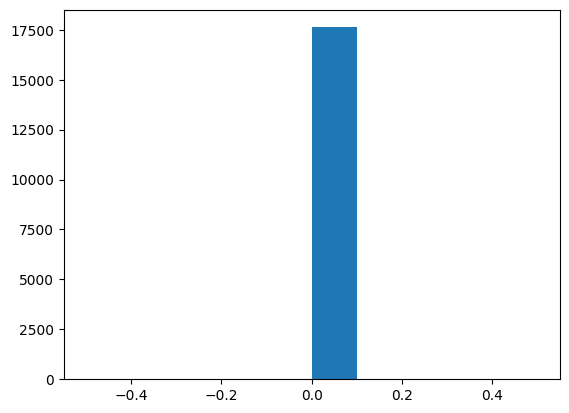

In [75]:
plt.hist(ce_j)

In [76]:
i = random.randint(0,len(output1)-1) #to choose a subject randomly

In [77]:
ce_i=[]

for j in index_false_input:
    ce_i.append(cross_entropy(0,output1_flat[i,j]))

/tmp/ipykernel_2787455/849717838.py:2: RuntimeWarning: divide by zero encountered in log
  return -i*np.log(o)-(1-i)*np.log(1-o)
/tmp/ipykernel_2787455/849717838.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  return -i*np.log(o)-(1-i)*np.log(1-o)


In [78]:
np.unique(ce_i)

array([-0.0000000e+00,  5.9604652e-08,  1.1920930e-07, ...,
        3.1354904e-01,  3.1384575e-01,            nan],
      shape=(1789,), dtype=float32)

In [79]:
np.nan_to_num(np.array(ce_i)).sum()

np.float32(6.5533223)

/tmp/ipykernel_2787455/3902293777.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


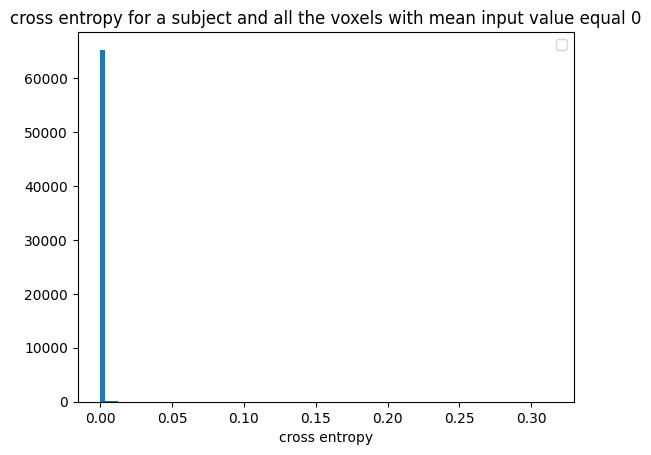

In [80]:
plt.hist(ce_i, bins=100)
plt.xlabel("cross entropy")
plt.title("cross entropy for a subject and all the voxels with mean input value equal 0")
plt.legend()
plt.show()

In [81]:
i = random.randint(0,len(output1)-1) #to choose a subject randomly

In [82]:
index0= np.where(true_input[i,:]==0)[0]
index1= np.where(true_input[i,:]==1)[0]

In [83]:
ce = [] #the list that will contain the cross_entropy of each voxel for the previous subject 

for j in range(len(true_output[1])):
    entropy= cross_entropy(true_input[i,j], true_output[i,j])
    ce.append(entropy)
ce=np.array(ce)


In [84]:
x=[true_input_mean[index0], true_input_mean[index1], true_input_mean]
y=[ce[index0], ce[index1], ce]

datasets= [(true_input_mean[index0],ce[index0]), (true_input_mean[index1],ce[index1]), (true_input_mean,ce)]

titles= ['Only the voxels with an input value equal to 0', 'Only the voxels with an input value equal to 1', 'All the voxels']

/tmp/ipykernel_2787455/2738533603.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8)


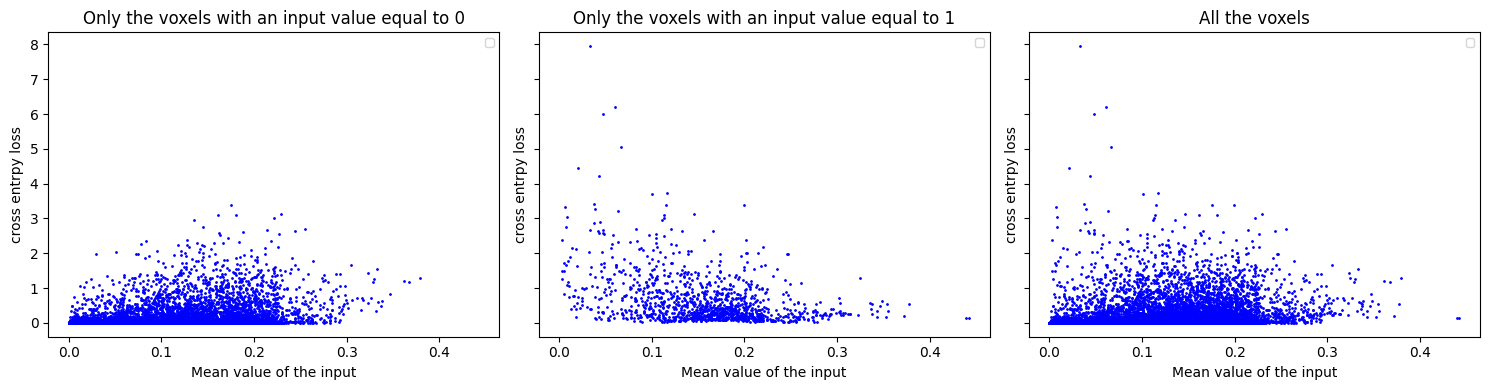

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

for i, (ax, (x, y)) in enumerate(zip(axes, datasets)):

    ax.scatter(x, y, color= 'blue', s=1)

    # the line y=0
    #ax.axhline(0, color='gray')

    # Droite de tendance (régression linéaire)
    coeffs = np.polyfit(x, y, deg=1)  # [pente, intercept]
    slope, intercept = coeffs
    y_fit = slope * x + intercept
    #ax.plot(np.sort(x), np.sort(y_fit), color='red', label='the trend line')

    ax.set_title(titles[i])
    ax.set_xlabel("Mean value of the input")
    ax.set_ylabel("cross entrpy loss")
    ax.legend(fontsize=8)
    #ax.grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

In [86]:
eps = 1e-20
entropy = np.sum(-input_flat[:1000,:] * np.log(output1_flat[:1000,:]+ eps) - 2*(1 - input_flat[:1000,:]) * np.log(1 - output1_flat[:1000,:] +eps), axis=1)

In [87]:
entropy.shape

(1000,)

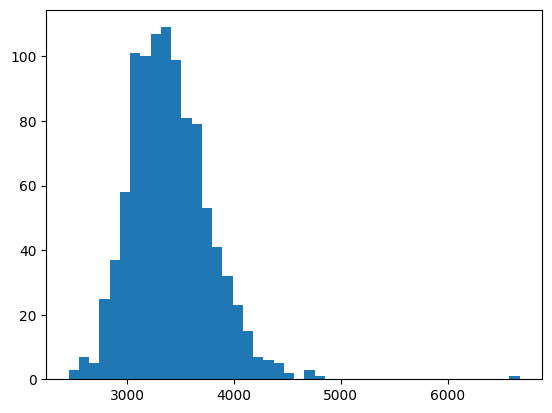

In [88]:
plt.hist(entropy, bins="auto")
plt.show()

In [89]:
input_hcp=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/hcp/inputs.npy")
output_hcp=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/hcp/outputs.npy")

input_epilepsy=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/epilepsy_PBS/inputs.npy")
output_epilepsy=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/epilepsy_PBS/outputs.npy")

In [90]:
output1_hcp=output_hcp[:,1,:,:,:]
output1_epilepsy=output_epilepsy[:,1,:,:,:]

In [91]:
input_flat_hcp = input_hcp.reshape(input_hcp.shape[0], -1)
output1_flat_hcp= output1_hcp.reshape(output1_hcp.shape[0], -1)

input_flat_epilepsy = input_epilepsy.reshape(input_epilepsy.shape[0], -1)
output1_flat_epilepsy = output1_epilepsy.reshape(output1_epilepsy.shape[0], -1)

In [92]:
index_irm_neg = [19,21,26,28,31,34,35,38,40,41,43,44,45]
index_irm_pos=[20,22,23,24,25,27,29,30,32,33,36,37,39,42,46,47,48,49,50,51,52,53,54,55,56]

In [93]:
input_control= input_flat_epilepsy[0:19,:]
output_control= output1_flat_epilepsy[0:19,:]

input_irm_neg= input_flat_epilepsy[index_irm_neg,:]
output_irm_neg= output1_flat_epilepsy[index_irm_neg,:]

input_irm_pos= input_flat_epilepsy[index_irm_pos,:]
output_irm_pos= output1_flat_epilepsy[index_irm_pos,:]

In [98]:
entropy_hcp = np.sum(-2*input_flat_hcp * np.log(output1_flat_hcp+ eps) - (1 - input_flat_hcp) * np.log(1 - output1_flat_hcp +eps), axis=1)
entropy_control = np.sum(-2*input_control * np.log(output_control+ eps) - (1 - input_control) * np.log(1 - output_control +eps), axis=1)
entropy_irm_neg = np.sum(-2*input_irm_neg * np.log(output_irm_neg+ eps) - (1 - input_irm_neg) * np.log(1 - output_irm_neg +eps), axis=1)
entropy_irm_pos = np.sum(-2*input_irm_pos * np.log(output_irm_pos+ eps) - (1 - input_irm_pos) * np.log(1 - output_irm_pos +eps), axis=1)

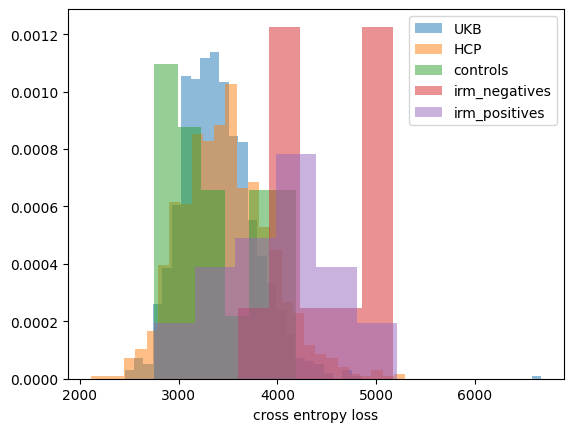

In [99]:
plt.hist(entropy, bins="auto", alpha=0.5, label="UKB", density=True)
plt.hist(entropy_hcp, bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(entropy_control, bins="auto", alpha=0.5, label="controls", density=True)
plt.hist(entropy_irm_neg, bins="auto", alpha=0.5, label="irm_negatives", density=True)
plt.hist(entropy_irm_pos, bins="auto", alpha=0.5, label="irm_positives", density=True)

plt.xlabel("cross entropy loss")

#plt.title("Reconstruction error on subjects with epilepsy")
plt.legend()
plt.show()

In [34]:
def compute_entropy(beta):
    entropy_hcp = np.sum(-beta* input_flat_hcp * np.log(output1_flat_hcp+ eps) - (1-beta)*(1 - input_flat_hcp) * np.log(1 - output1_flat_hcp +eps), axis=1)
    entropy_control = np.sum(-beta* input_control * np.log(output_control+ eps) - (1-beta)*(1 - input_control) * np.log(1 - output_control +eps), axis=1)   
    entropy_irm_neg = np.sum(-beta*input_irm_neg * np.log(output_irm_neg+ eps) - (1-beta)*(1 - input_irm_neg) * np.log(1 - output_irm_neg +eps), axis=1)
    entropy_irm_pos = np.sum(-beta*input_irm_pos * np.log(output_irm_pos+ eps) - (1-beta)*(1 - input_irm_pos) * np.log(1 - output_irm_pos +eps), axis=1)

    mean_hcp= entropy_hcp.mean()
    mean_control=entropy_control.mean()
    mean_neg= entropy_irm_neg.mean()
    mean_pos=entropy_irm_pos.mean()

    hcp_control= abs(mean_hcp-mean_control)/(mean_hcp+mean_control)
    control_neg= abs(mean_control- mean_neg)/(mean_control+mean_neg)
    control_pos= abs(mean_control- mean_pos)/(mean_control+mean_pos)

    return hcp_control, control_neg, control_pos


In [ ]:
beta= np.linspace(0,1,50)

#hcp_control, control_neg, control_pos= compute_entropy(beta)
hcp_control, control_neg, control_pos= [], [], []

for b in beta:
    c,d,e=compute_entropy(b)
    hcp_control.append(c)
    control_neg.append(d)
    control_pos.append(e) 


In [50]:
somme= -np.array(hcp_control)+ np.array(control_neg)+np.array(control_pos)
somme.shape

(50,)

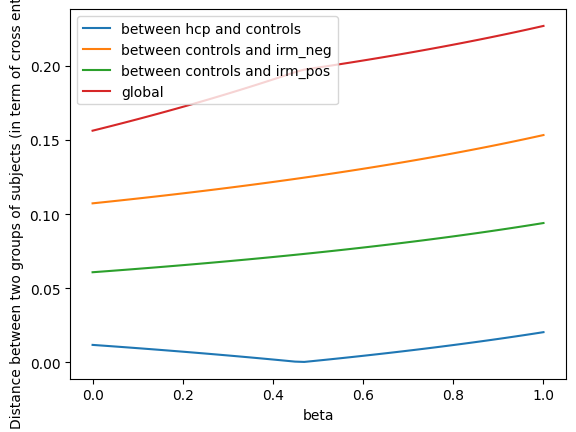

In [53]:
plt.plot(beta, hcp_control, label= "between hcp and controls")
plt.plot(beta, control_neg, label="between controls and irm_neg")
plt.plot(beta, control_pos, label="between controls and irm_pos")
plt.plot(beta, somme, label="global")
plt.xlabel("beta")
plt.ylabel("Distance between two groups of subjects (in term of cross entropy)")
plt.legend()
plt.show()


In [52]:
from scipy.stats import mannwhitneyu

In [61]:
def p_value(beta):
    entropy_hcp = np.sum(-beta* input_flat_hcp * np.log(output1_flat_hcp+ eps) - (1-beta)*(1 - input_flat_hcp) * np.log(1 - output1_flat_hcp +eps), axis=1)
    entropy_control = np.sum(-beta* input_control * np.log(output_control+ eps) - (1-beta)*(1 - input_control) * np.log(1 - output_control +eps), axis=1)   
    entropy_irm_neg = np.sum(-beta*input_irm_neg * np.log(output_irm_neg+ eps) - (1-beta)*(1 - input_irm_neg) * np.log(1 - output_irm_neg +eps), axis=1)
    entropy_irm_pos = np.sum(-beta*input_irm_pos * np.log(output_irm_pos+ eps) - (1-beta)*(1 - input_irm_pos) * np.log(1 - output_irm_pos +eps), axis=1)

    
    stat1, p_hcp_control = mannwhitneyu(entropy_hcp, entropy_control, alternative='two-sided')
    stat2, p_control_neg = mannwhitneyu(entropy_control, entropy_irm_neg, alternative='two-sided')
    stat3, p_control_pos = mannwhitneyu(entropy_control, entropy_irm_pos, alternative='two-sided')

    return -np.log10(p_hcp_control), -np.log10(p_control_neg), -np.log10(p_control_pos)

In [62]:
p_hcp_control, p_control_neg, p_control_pos= [], [], []

for b in beta:
    c,d,e=p_value(b)
    p_hcp_control.append(c)
    p_control_neg.append(d)
    p_control_pos.append(e) 

In [64]:
p_somme= -np.array(p_hcp_control)+ np.array(p_control_neg)+np.array(p_control_pos)

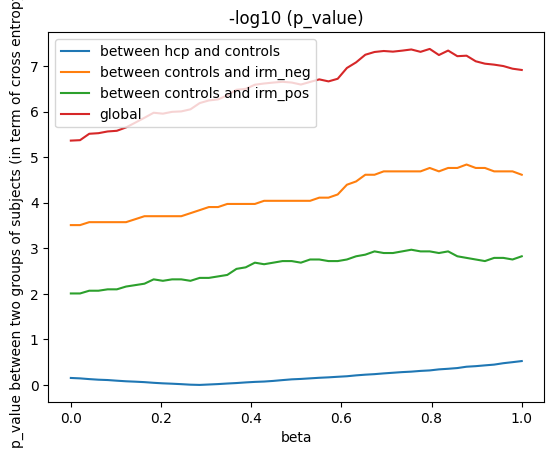

In [66]:
plt.plot(beta, p_hcp_control, label= "between hcp and controls")
plt.plot(beta, p_control_neg, label="between controls and irm_neg")
plt.plot(beta, p_control_pos, label="between controls and irm_pos")
plt.plot(beta, p_somme, label="global")
plt.xlabel("beta")
plt.ylabel("p_value between two groups of subjects (in term of cross entropy)")
plt.title("-log10 (p_value)")
plt.legend()
plt.show()

In [44]:
beta=2/3

def compute_cross_entropy(Input, Output): #Input and Output with shape (n,a,b,c)

    loss = -beta*Input * np.log(Output + eps) - (1-beta)*(1 - Input) * np.log(1 - Output + eps)

    loss_per_subject = np.mean(loss, axis=(1, 2, 3))  # shape (n,)
    loss_mean = np.mean(loss_per_subject)
    return loss_mean

In [45]:
input=input[:,0,:,:,:]
input.shape

IndexError: too many indices for array: array is 4-dimensional, but 5 were indexed

In [46]:
input_hcp=input_hcp[:,0,:,:,:]
input_epilepsy=input_epilepsy[:,0,:,:,:]

IndexError: too many indices for array: array is 4-dimensional, but 5 were indexed

In [47]:
mean_input= np.mean(input, axis=0)

In [59]:
coords = np.where(mean_input > 0)
amin, amax = coords[0].min(), coords[0].max()
bmin, bmax = coords[1].min(), coords[1].max()
cmin, cmax = coords[2].min(), coords[2].max()

input_restricted = input[:1000, amin:amax+1, bmin:bmax+1, cmin:cmax+1]
output_restricted = output1[:1000, amin:amax+1, bmin:bmax+1, cmin:cmax+1]

input_hcp_restricted = input_hcp[:, amin:amax+1, bmin:bmax+1, cmin:cmax+1]
output_hcp_restricted = output1_hcp[:, amin:amax+1, bmin:bmax+1, cmin:cmax+1]

input_epilepsy_restricted = input_epilepsy[:, amin:amax+1, bmin:bmax+1, cmin:cmax+1]
output_epilepsy_restricted = output1_epilepsy[:, amin:amax+1, bmin:bmax+1, cmin:cmax+1]

In [60]:
input_control_restricted= input_epilepsy_restricted[0:19,:,:,:]
output_control_restricted= output_epilepsy_restricted[0:19,:,:,:]

input_neg_restricted= input_epilepsy_restricted[index_irm_neg,:,:,:]
output_neg_restricted= output_epilepsy_restricted[index_irm_neg,:,:,:]

input_pos_restricted= input_epilepsy_restricted[index_irm_pos,:,:,:]
output_pos_restricted= output_epilepsy_restricted[index_irm_pos,:,:,:]

In [61]:

def restricted(Input, Output):
    Input=Input[:,:-1,:-1,:-1]
    Output=Output[:,:-1,:-1,:-1]

    return Input, Output

In [62]:
eps = 1e-20

In [63]:
entropie_avec_rognage=[]
entropie_avec_rognage_hcp=[]
entropie_avec_rognage_control=[]
entropie_avec_rognage_neg=[]
entropie_avec_rognage_pos=[]

entropie_avec_rognage.append(compute_cross_entropy(input_restricted, output_restricted))
entropie_avec_rognage_hcp.append(compute_cross_entropy(input_hcp_restricted, output_hcp_restricted))
entropie_avec_rognage_control.append(compute_cross_entropy(input_control_restricted, output_control_restricted))
entropie_avec_rognage_neg.append(compute_cross_entropy(input_neg_restricted, output_neg_restricted))
entropie_avec_rognage_pos.append(compute_cross_entropy(input_pos_restricted, output_pos_restricted))
print(input_restricted.shape)
i=0
while (len(output_restricted[0])>1) and (len(output_restricted[0][0])>1) and (len(output_restricted[0][0][0])>1):

    input_restricted, output_restricted = restricted(input_restricted, output_restricted)
    input_hcp_restricted, output_hcp_restricted = restricted(input_hcp_restricted, output_hcp_restricted)
    input_control_restricted, output_control_restricted = restricted(input_control_restricted, output_control_restricted)
    input_neg_restricted, output_neg_restricted = restricted(input_neg_restricted, output_neg_restricted)
    input_pos_restricted, output_pos_restricted = restricted(input_pos_restricted, output_pos_restricted)
    print(i)
    entropie_avec_rognage.append(compute_cross_entropy(input_restricted, output_restricted))
    entropie_avec_rognage_hcp.append(compute_cross_entropy(input_hcp_restricted, output_hcp_restricted))
    entropie_avec_rognage_control.append(compute_cross_entropy(input_control_restricted, output_control_restricted))
    entropie_avec_rognage_neg.append(compute_cross_entropy(input_neg_restricted, output_neg_restricted))
    entropie_avec_rognage_pos.append(compute_cross_entropy(input_pos_restricted, output_pos_restricted))
    i+=1
    print(input_restricted.shape)

(1000, 40, 34, 49)
0
(1000, 39, 33, 48)
1
(1000, 38, 32, 47)
2
(1000, 37, 31, 46)
3
(1000, 36, 30, 45)
4
(1000, 35, 29, 44)
5
(1000, 34, 28, 43)
6
(1000, 33, 27, 42)
7
(1000, 32, 26, 41)
8
(1000, 31, 25, 40)
9
(1000, 30, 24, 39)
10
(1000, 29, 23, 38)
11
(1000, 28, 22, 37)
12
(1000, 27, 21, 36)
13
(1000, 26, 20, 35)
14
(1000, 25, 19, 34)
15
(1000, 24, 18, 33)
16
(1000, 23, 17, 32)
17
(1000, 22, 16, 31)
18
(1000, 21, 15, 30)
19
(1000, 20, 14, 29)
20
(1000, 19, 13, 28)
21
(1000, 18, 12, 27)
22
(1000, 17, 11, 26)
23
(1000, 16, 10, 25)
24
(1000, 15, 9, 24)
25
(1000, 14, 8, 23)
26
(1000, 13, 7, 22)
27
(1000, 12, 6, 21)
28
(1000, 11, 5, 20)
29
(1000, 10, 4, 19)
30
(1000, 9, 3, 18)
31
(1000, 8, 2, 17)
32
(1000, 7, 1, 16)


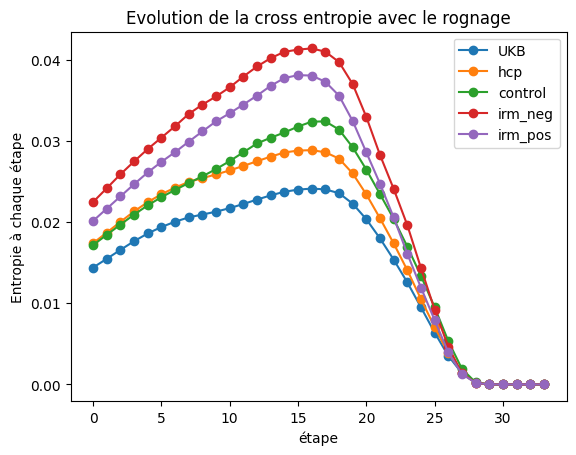

In [64]:
plt.plot(entropie_avec_rognage, marker='o', linestyle='-', label="UKB")
plt.plot(entropie_avec_rognage_hcp, marker='o', linestyle='-', label="hcp")
plt.plot(entropie_avec_rognage_control, marker='o', linestyle='-', label="control")
plt.plot(entropie_avec_rognage_neg, marker='o', linestyle='-', label="irm_neg")
plt.plot(entropie_avec_rognage_pos, marker='o', linestyle='-', label="irm_pos")
plt.xlabel("étape")
plt.ylabel("Entropie à chaque étape")
plt.title("Evolution de la cross entropie avec le rognage")
plt.legend()
plt.show()
